In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
class BayesClassifier:
    def fit(self, X, Y):
        
        #classes are numbered 0...K-1
        self.K = len(set(Y))
        
        self.gaussians = []
        for k in range(self.K):
            Xk = X[Y == k]
            mean = Xk.mean(axis=0)
            cov = np.cov(Xk.T)
            g = {'m':mean, 'c':cov}
            self.gaussians.append(g)
            
    def sample_given_y(self, y):
            
        g = self.gaussians[y]
        return mvn.rvs(mean=g['m'], cov=g['c'])
        
    def sample(self):
        y = np.random.randint(self.K)
        return self.sample_given_y(y)

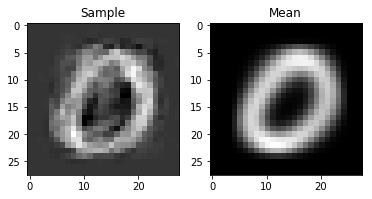

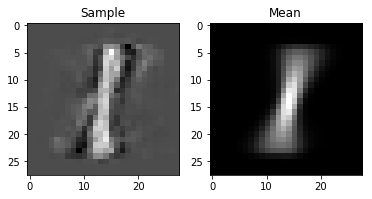

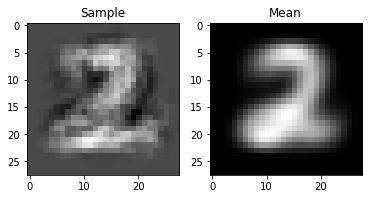

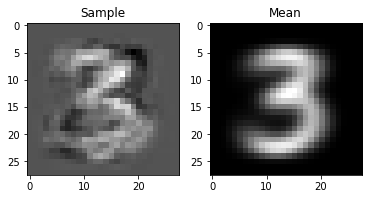

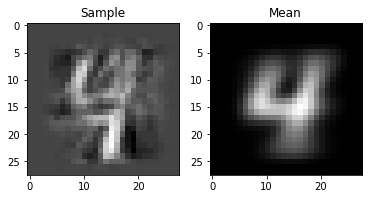

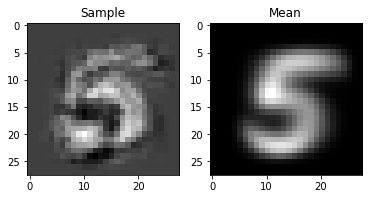

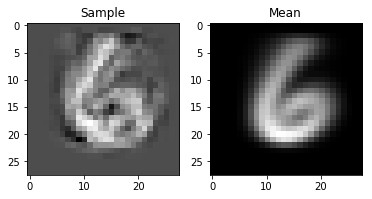

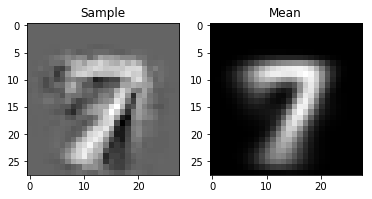

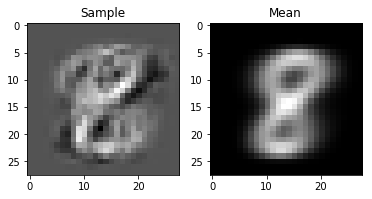

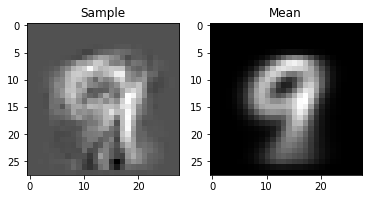

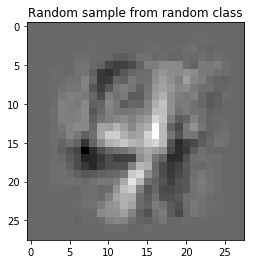

In [14]:
if __name__=='__main__':
    
    X_train = mnist.train.images
    Y_train = mnist.train.labels
    
    X_test = mnist.test.images
    Y_test = mnist.test.labels
    
    clf = BayesClassifier()
    clf.fit(X_train,Y_train)
    
    for k in range(clf.K):
        
        sample = clf.sample_given_y(k).reshape(28, 28)
        mean = clf.gaussians[k]['m'].reshape(28, 28)
        
        plt.subplot(1,2,1)
        plt.imshow(sample, cmap='gray')
        plt.title("Sample")
        
        plt.subplot(1,2,2)
        plt.imshow(mean, cmap='gray')
        plt.title("Mean")
        
        plt.show()
    
    sample = clf.sample().reshape(28, 28)
    plt.imshow(sample, cmap='gray')
    plt.title("Random sample from random class")
    plt.show()